<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
  tree,
  out_file="iris_tree.dot",
  feature_names=iris.feature_names[2:],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

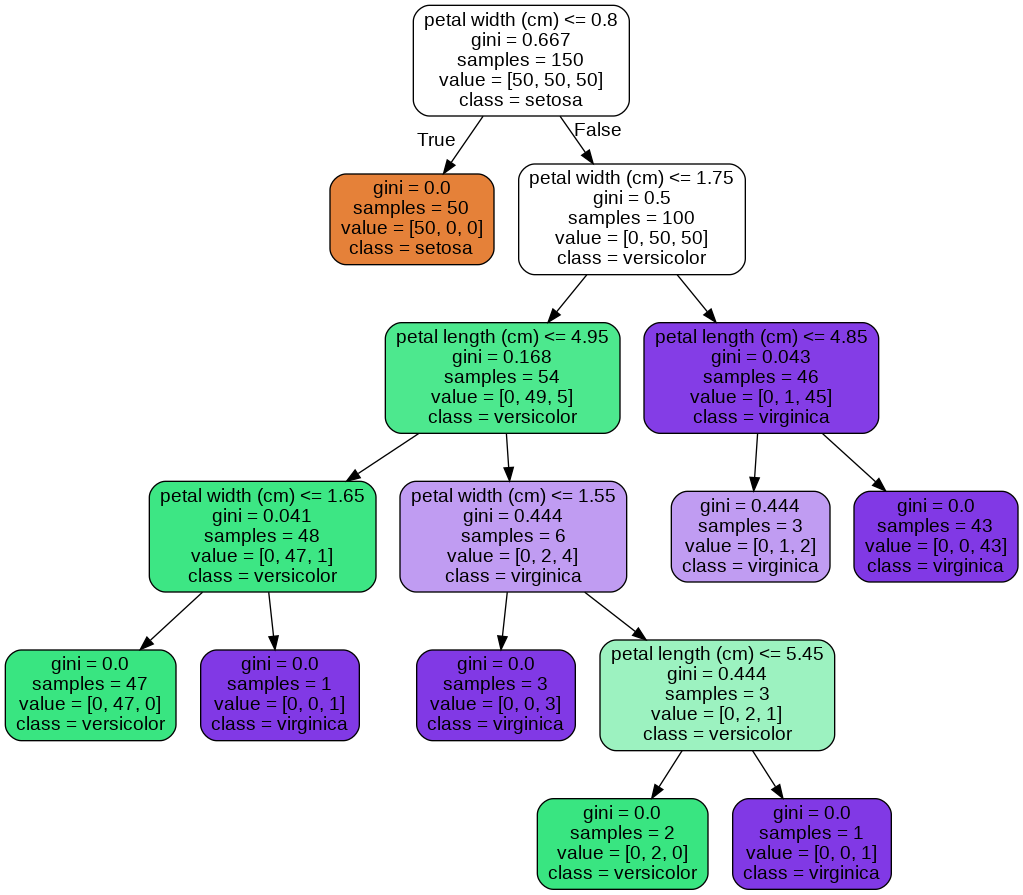

In [8]:
from PIL import Image
!dot -Tpng iris_tree.dot -o iris_tree.png
Image.open('iris_tree.png')

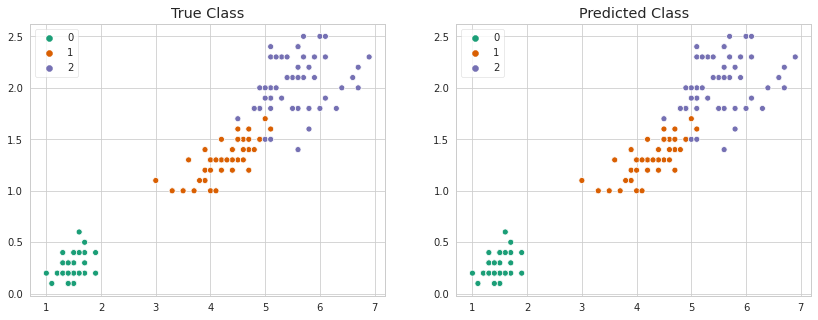

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].set_title('True Class')
ax[1].set_title('Predicted Class')

sns.scatterplot(X[:,0], X[:,1], hue=y, palette='Dark2', ax=ax[0]);
sns.scatterplot(X[:,0], X[:,1], hue=tree.predict(X), palette='Dark2', ax=ax[1]);

In [10]:
from sklearn.metrics import classification_report, mean_squared_error
print(classification_report(y, tree.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [41]:
from sklearn.datasets import make_moons
data,label = make_moons(500, noise=0.15)
X = data[np.where(label==1), 0].reshape(-1,)
y = data[np.where(label==1), 1].reshape(-1,)

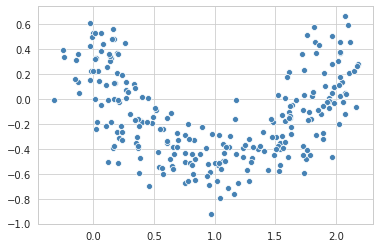

In [43]:
sns.scatterplot(X, y, color='steelblue');

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X.reshape(-1,1),y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

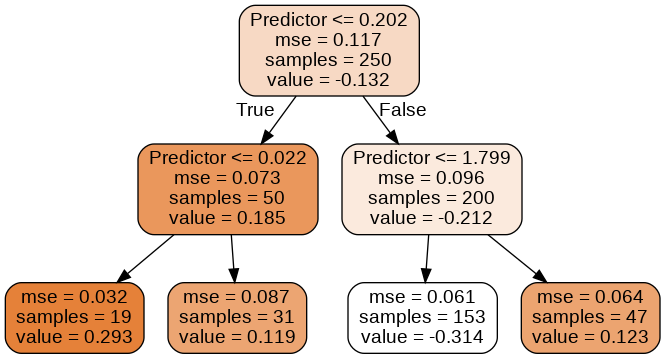

In [50]:
export_graphviz(
  tree,
  out_file="moon_tree.dot",
  feature_names= ['Predictor'],
  rounded=True,
  filled=True
)

!dot -Tpng moon_tree.dot -o moon_tree.png
Image.open('moon_tree.png')

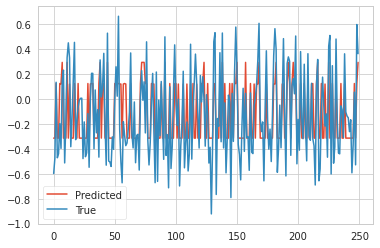

In [56]:
sns.lineplot(np.arange(len(X)), tree.predict(X.reshape(-1,1)), label='Predicted')
sns.lineplot(np.arange(len(X)), y, label='True');

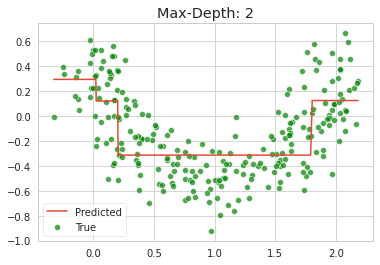

In [63]:
plt.title('Max-Depth: 2')
sns.lineplot(X, tree.predict(X.reshape(-1,1)), label='Predicted')
sns.scatterplot(X, y, label='True', color='green', alpha=0.7);

In [81]:
tree = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X.reshape(-1,1),y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

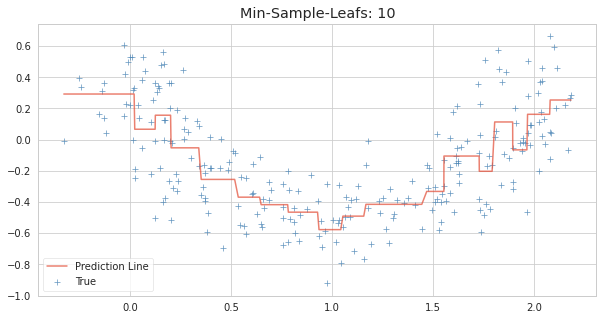

In [83]:
plt.figure(figsize=(10,5))
plt.title('Min-Sample-Leafs: 10')
sns.lineplot(X, tree.predict(X.reshape(-1,1)), label='Prediction Line', alpha=0.7)
sns.scatterplot(X, y, label='True', color='steelblue', alpha=0.8, marker='+');